# Waze Project Course 6

**=================================================================================================================**

## Project Description

Your team is close to completing their user churn project. Previously, you completed a project proposal, and used Python to explore and analyze Waze’s user data, create data visualizations, and conduct a hypothesis test. Most recently, you built a binomial logistic regression model based on multiple variables.

Leadership appreciates all your hard work. Now, they want your team to build a machine learning model to predict user churn. To get the best results, your team decides to build and test two tree-based models: random forest and XGBoost.

Your work will help leadership make informed business decisions to prevent user churn, improve user retention, and grow Waze’s business.


## Business Task

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.
<br/>

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps


## Data Tasks

- Load Data
- Perform GridSearchCV or RandomSearch CV
- Apply best hyperparameters into model
- Evaluate the model
- Perform Cross Validation
- Record results

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import datetime
from datetime import datetime, timedelta, date

import scipy.stats
from scipy.stats import zscore
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
# from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
# from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
# from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.inspection import permutation_importance, plot_partial_dependence

from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import catboost
from catboost import CatBoostClassifier


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

# Ensure results are reproducible
random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**=================================================================================================================**

## Data Quick Glance

In [2]:
df = pd.read_csv("wazesmotetlink2.csv")

In [3]:
df.head()

,drives,totalsessions,ndaysafteronboarding,totalnavigationsfav1,totalnavigationsfav2,activitydays,kmperdrivingday,label
0,95,135.52,2651,0,0,14,382.39,0
1,40,67.59,15,322,7,7,304.53,0
2,68,168.25,1562,166,5,27,219.46,0
3,103,279.54,2637,0,0,15,81.93,0
4,35,176.07,2999,0,0,22,394.60,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17496 entries, 0 to 17495
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drives                17496 non-null  int64  
 1   totalsessions         17496 non-null  float64
 2   ndaysafteronboarding  17496 non-null  int64  
 3   totalnavigationsfav1  17496 non-null  int64  
 4   totalnavigationsfav2  17496 non-null  int64  
 5   activitydays          17496 non-null  int64  
 6   kmperdrivingday       17496 non-null  float64
 7   label                 17496 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


In [5]:
df.dtypes.value_counts()

int64      6
float64    2
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,drives,totalsessions,ndaysafteronboarding,totalnavigationsfav1,totalnavigationsfav2,activitydays,kmperdrivingday,label
count,17496.00,17496.00,17496.00,17496.00,17496.00,17496.00,17496.00,17496.00
mean,56.17,166.46,1643.65,102.70,20.19,14.42,312.18,0.50
std,43.24,97.73,999.38,101.98,25.39,8.42,265.95,0.50
min,0.00,0.22,6.00,0.00,0.00,0.00,0.00,0.00
25%,22.00,92.37,775.75,17.00,0.00,8.00,116.66,0.00
50%,46.00,148.73,1559.00,72.00,9.00,14.00,240.20,0.50
75%,80.00,223.92,2489.00,161.00,33.00,21.00,442.68,1.00
max,202.00,499.03,3498.00,431.00,107.00,31.00,1192.09,1.00


In [7]:
# Descriptive Statistical Analysis
# df.describe(include=["int", "float"])

In [8]:
# Descriptive Statistical Analysis
# df.describe(include="object")

In [9]:
df.shape

(17496, 8)

In [10]:
df.columns

Index(['drives', 'totalsessions', 'ndaysafteronboarding', 'totalnavigationsfav1', 'totalnavigationsfav2', 'activitydays', 'kmperdrivingday', 'label'], dtype='object')

In [11]:
# Check class balance
df['label'].value_counts().to_frame()

,label
0,8748
1,8748


**=================================================================================================================**

## Data Visualization

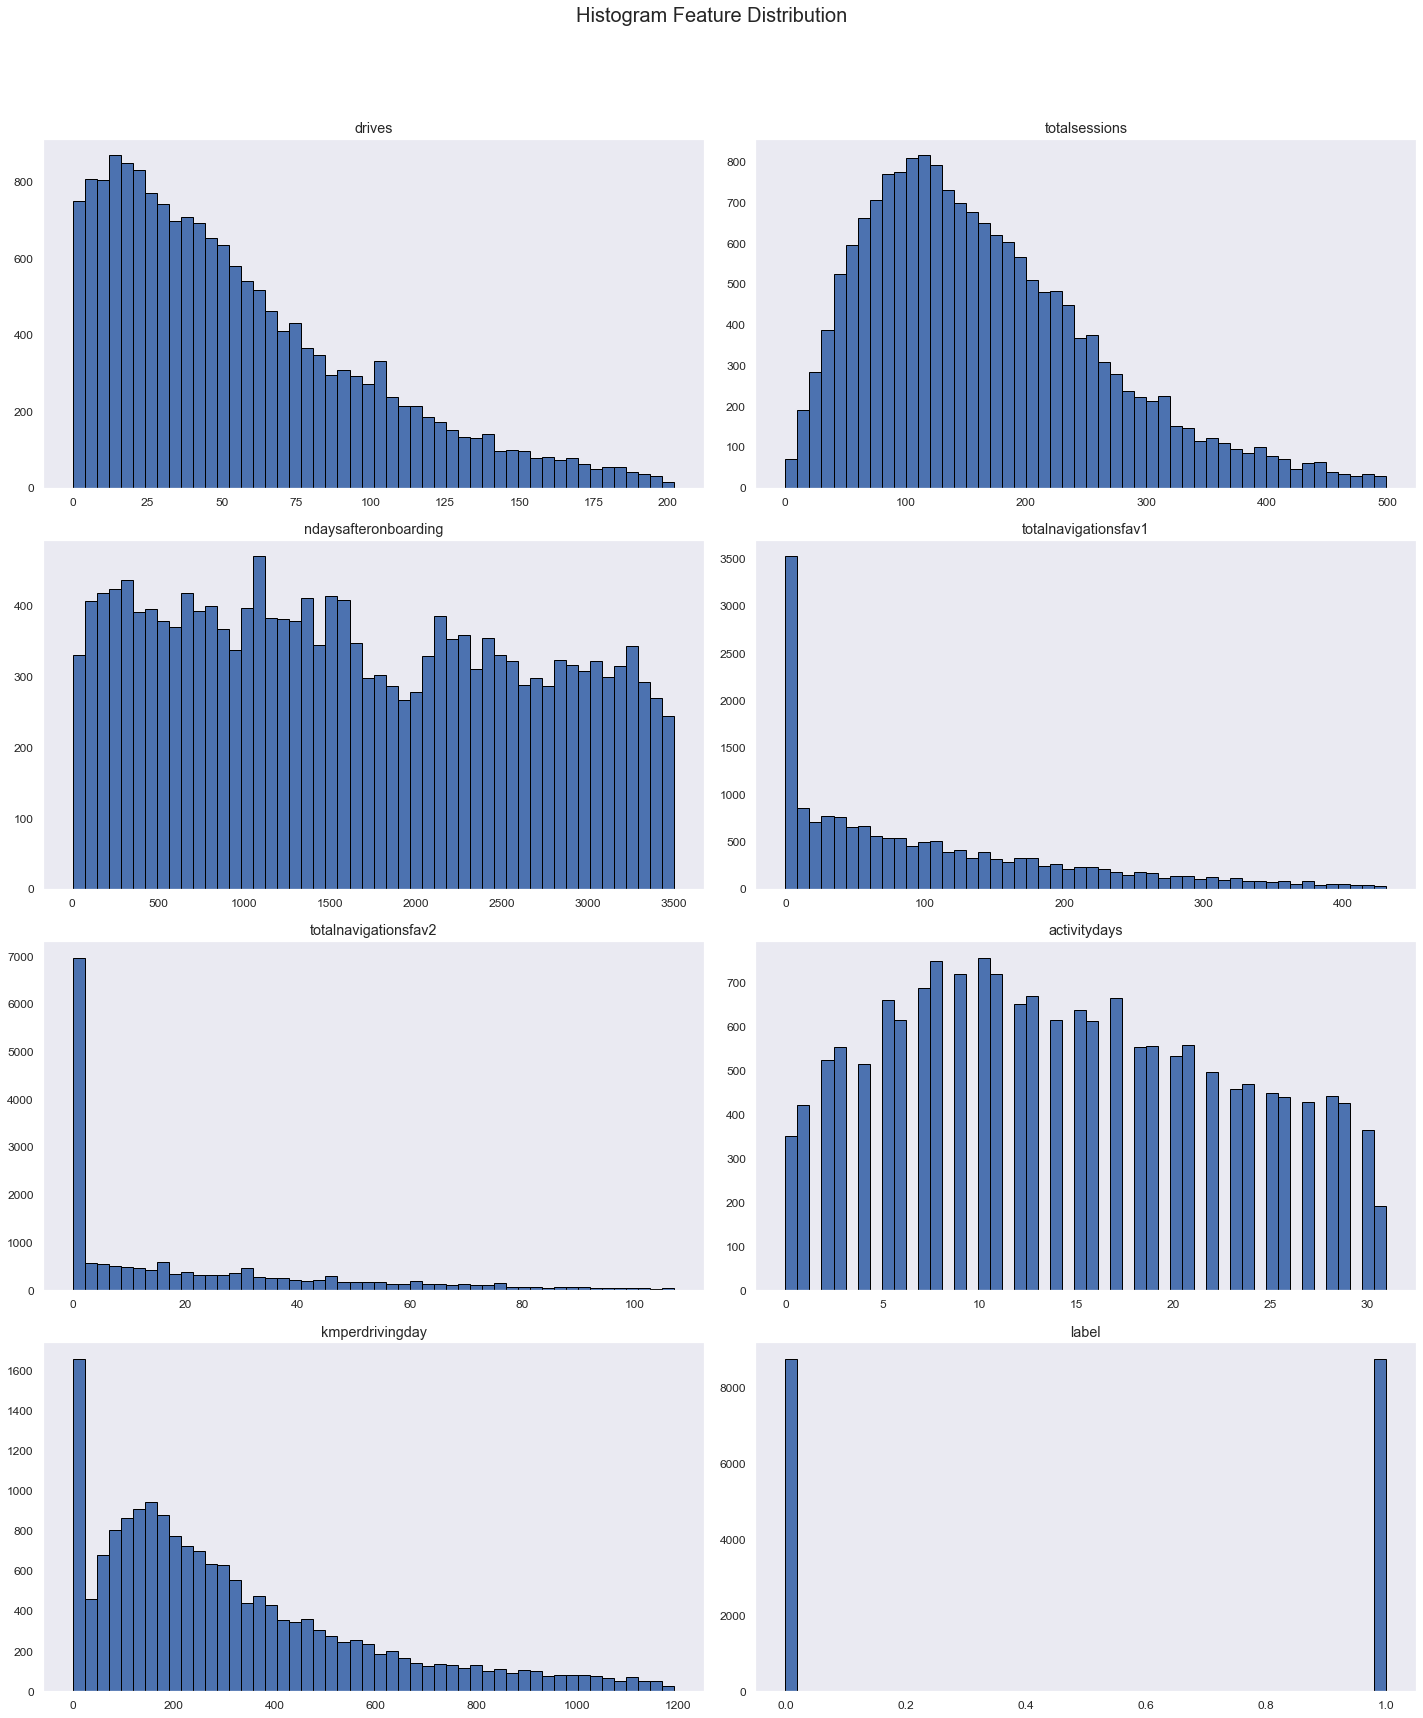

In [12]:
df.hist(bins=50, figsize=(20,45), grid=False, layout=(len(df.columns),2), edgecolor = 'black')
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

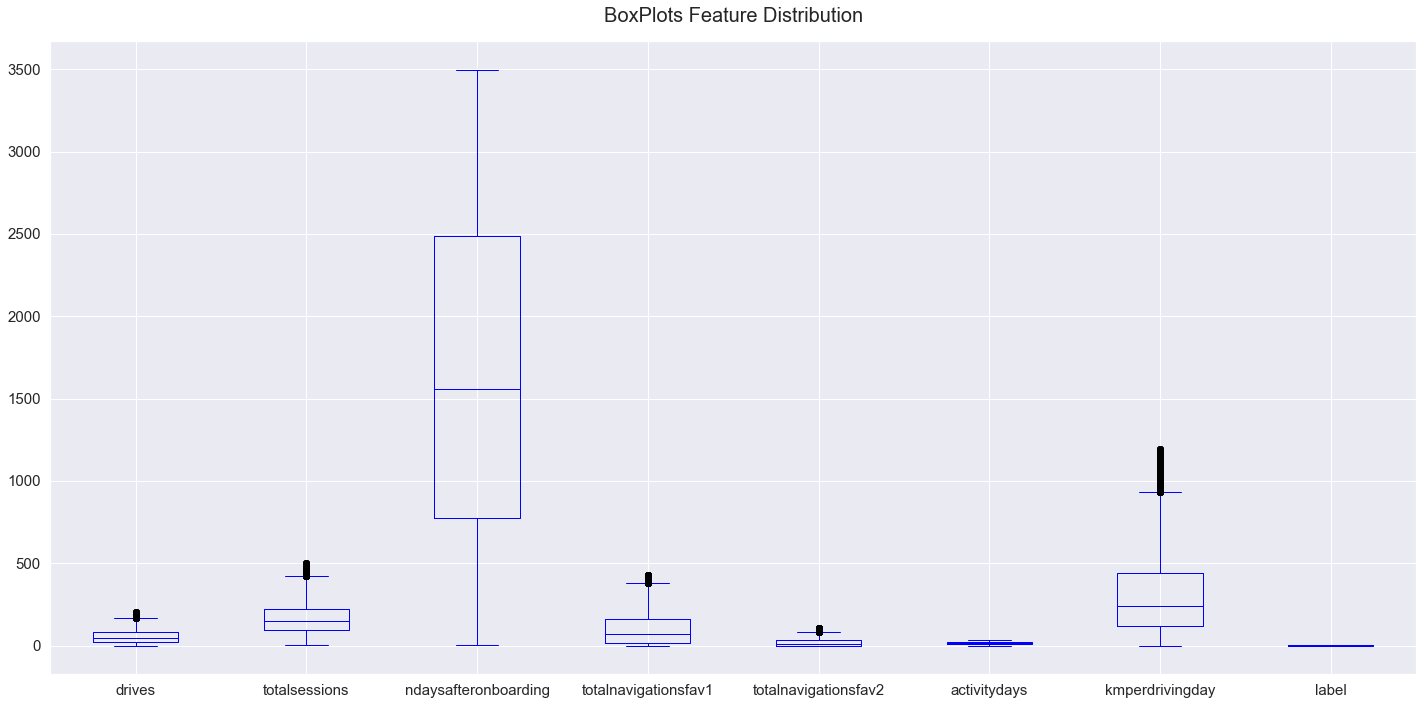

In [13]:
df.boxplot(figsize=(20,10), color="blue", fontsize = 15)
plt.title('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

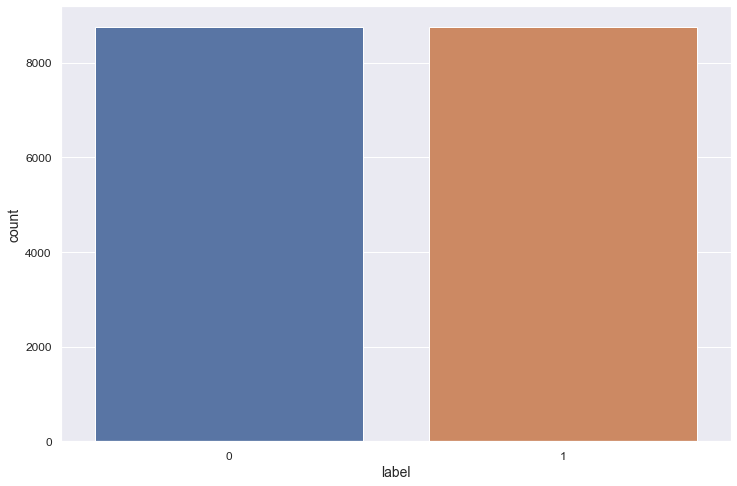

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=df.label, data=df)
plt.show()

In [15]:
df.corr()

,drives,totalsessions,ndaysafteronboarding,totalnavigationsfav1,totalnavigationsfav2,activitydays,kmperdrivingday,label
drives,1.00,0.51,0.01,0.01,0.01,0.03,-0.01,0.01
totalsessions,0.51,1.00,0.02,0.00,-0.00,0.02,0.02,0.00
ndaysafteronboarding,0.01,0.02,1.00,0.01,-0.01,0.00,-0.01,-0.16
totalnavigationsfav1,0.01,0.00,0.01,1.00,0.02,0.00,0.00,0.05
totalnavigationsfav2,0.01,-0.00,-0.01,0.02,1.00,-0.01,0.02,0.00
activitydays,0.03,0.02,0.00,0.00,-0.01,1.00,-0.26,-0.38
kmperdrivingday,-0.01,0.02,-0.01,0.00,0.02,-0.26,1.00,0.09
label,0.01,0.00,-0.16,0.05,0.00,-0.38,0.09,1.00


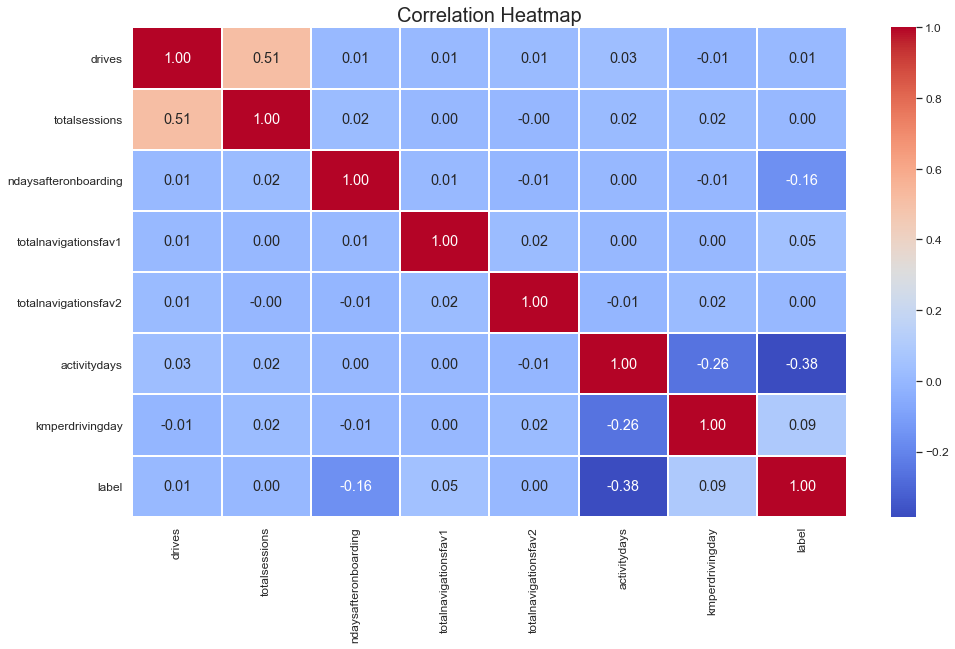

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==================================================================================================================**

# Feature selection / Dimensionality Reduction

Feature selection is the process of choosing features to be used for modeling. In practice, feature selection takes place at multiple points in the PACE process. Although sometimes you will be given a dataset and a defined target variable, most often in practice you will begin with only a question or a problem that you are tasked with solving. In these cases, if you decide that the problem requires a model, you'll then have to:

* Consider what data is available to you
* Decide on what kind of model you need
* Decide on a target variable
* Assemble a collection of features that you think might help predict on your chosen target

This would all take place during the **Plan** phase. 

Then, during the **Analyze** phase, you would perform EDA on the data and reevaluate your variables for appropriateness. For example, can your model handle null values? If not, what do you do with features with a lot of nulls? Perhaps you drop them. This too is feature selection.

But it doesn't end there. Feature selection also occurs during the **Construct** phase. This usually involves building a model, examining which features are most predictive, and then removing the unpredictive features.

There's a lot of work involved in feature selection. In our case, we already have a dataset, and we're not performing thorough EDA on it. But we can still examine the data to ensure that all the features can reasonably be expected to have predictive potential. 

In [17]:
df.shape

(17496, 8)

In [18]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [19]:
X.values, y.values

(array([[  95.        ,  135.5229263 , 2651.        , ...,    0.        ,
           14.        ,  382.3936023 ],
        [  40.        ,   67.58922127,   15.        , ...,    7.        ,
            7.        ,  304.5303744 ],
        [  68.        ,  168.2470201 , 1562.        , ...,    5.        ,
           27.        ,  219.4556671 ],
        ...,
        [  13.        ,  183.9310885 , 1199.        , ...,    0.        ,
            3.        ,  570.4093491 ],
        [ 114.        ,  240.5309093 , 3407.        , ...,   29.        ,
           10.        ,  473.3678562 ],
        [  15.        ,   79.71985519, 1524.        , ...,    0.        ,
           12.        ,  379.5351069 ]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13996, 7), (3500, 7), (13996,), (3500,))

# Filter Methods (Basics)

### Constant and Quasi-constant features with Feature-engine

In this notebook, we will remove constant and quasi-constant features utilizing the new functionality from Feature-engine.

### Remove constant features

The DropConstantFeatures class from Feature-engine finds and removes constant and quasi-constant features from a dataset. We can remove constant features by setting the parameter tol to 1, or quasi-constant with smaller values for tol.

In [22]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')

In [23]:
sel.fit(X_train)

DropConstantFeatures()

In [24]:
# list of constant features

sel.features_to_drop_

[]

### Remove quasi-constant features

In [25]:
sel = DropConstantFeatures(tol=0.99, variables=None, missing_values='raise') #90% majority observations

In [26]:
sel.fit(X_train)

DropConstantFeatures(tol=0.99)

In [27]:
# list of quasi-constant features

sel.features_to_drop_

[]

### Duplicated features with Feature-engine

In this notebook, we will identify and remove duplicated features with Feature-engine.

In [28]:
# set up the selector
sel = DropDuplicateFeatures(variables=None, missing_values='raise')

In [29]:
# find the duplicate features, this might take a while
sel.fit(X_train)

DropDuplicateFeatures(missing_values='raise')

In [30]:
# these are the pairs of duplicated features
# each set are duplicates

sel.duplicated_feature_sets_

[]

### VIF

In [31]:
vif_data = pd.DataFrame()

In [32]:
vif_data["feature"] = X.columns

In [33]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                      for i in range(len(X.columns))]

In [34]:
vif_data.style.background_gradient(cmap="coolwarm")

,feature,VIF
0,drives,3.580901
1,totalsessions,4.776320
2,ndaysafteronboarding,3.009998
3,totalnavigationsfav1,1.878750
4,totalnavigationsfav2,1.563133
5,activitydays,2.950260
6,kmperdrivingday,2.057032


In [35]:
# df.drop(["drivenkmdrives","durationminutesdrives"], axis=1, inplace=True)

In [36]:
# df.columns

In [37]:
#df.to_csv("wazesmotetlink2.csv", index=False)

### Feature Elimination using RFECV

In [38]:
model = RandomForestClassifier()

In [39]:
rfe = RFE(estimator=model,  n_features_to_select=None,  step=1,  verbose=0,  importance_getter='auto')

In [40]:
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier())

In [41]:
rfe.get_support()

array([False,  True,  True, False, False, False,  True])

In [42]:
rfe.ranking_

array([4, 1, 1, 3, 5, 2, 1])

In [43]:
pd.DataFrame({'features': X.columns, 'rank': rfe.ranking_}).sort_values(by='rank')

,features,rank
1,totalsessions,1
2,ndaysafteronboarding,1
6,kmperdrivingday,1
5,activitydays,2
3,totalnavigationsfav1,3
0,drives,4
4,totalnavigationsfav2,5


In [44]:
rfecv = RFECV(estimator=model, step = 1, min_features_to_select = 1 , cv=5, scoring="roc_auc", n_jobs = 2)

In [45]:
rfecv.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestClassifier(), n_jobs=2, scoring='roc_auc')

In [46]:
# Optimal number of features
rfecv.n_features_

7

In [47]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [48]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1])

In [49]:
pd.DataFrame({'features': X.columns, 'rank': rfecv.ranking_}).sort_values(by='rank')

,features,rank
0,drives,1
1,totalsessions,1
2,ndaysafteronboarding,1
3,totalnavigationsfav1,1
4,totalnavigationsfav2,1
5,activitydays,1
6,kmperdrivingday,1


In [50]:
# df.drop(["android","professionaldriver"], axis=1, inplace=True)

In [51]:
# df.columns

In [52]:
#df.to_csv("wazesmotetlink2.csv", index=False)

**=================================================================================================================**

## Create a small dataset for model training

In [53]:
df = df.sample(frac=0.5)

In [54]:
df.reset_index(drop=True, inplace=True)

In [55]:
df.head()

,drives,totalsessions,ndaysafteronboarding,totalnavigationsfav1,totalnavigationsfav2,activitydays,kmperdrivingday,label
0,10,337.18,3185,49,0,18,185.80,0
1,71,177.66,1328,231,58,27,157.17,0
2,25,117.83,1491,115,0,5,488.20,1
3,41,71.75,1789,23,79,5,628.73,1
4,41,218.87,1993,28,15,7,823.65,0


In [56]:
df.shape

(8748, 8)

**=================================================================================================================**

## Create a random dataset for Hyperparameter Tuning

In [57]:
df_random = df.sample(n=1700, random_state=0)

In [58]:
df_random.shape

(1700, 8)

In [59]:
X_random = df_random.iloc[:,:7]
y_random = df_random.iloc[:,7]

In [60]:
X_random.values, y_random.values

(array([[ 195.        ,  392.3747347 , 2729.        , ...,   78.        ,
           14.        ,  262.3032354 ],
        [  40.        ,  107.8338314 ,  267.        , ...,    9.        ,
           20.        ,   62.65054083],
        [   5.        ,   31.15916194, 3234.        , ...,   98.        ,
           21.        ,  332.0350919 ],
        ...,
        [  14.        ,  150.5623897 , 3282.        , ...,    0.        ,
            9.        ,  483.2489823 ],
        [ 184.        ,  486.6825423 , 1081.        , ...,    0.        ,
           13.        , 1154.609612  ],
        [  18.        ,  165.0627981 , 3291.        , ...,   12.        ,
           12.        ,  108.2766063 ]]),
 array([0, 1, 1, ..., 0, 1, 1], dtype=int64))

In [61]:
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_random, y_random, test_size=0.2, random_state=0, stratify=y_random)

In [62]:
X_random_train.shape, X_random_test.shape, y_random_train.shape, y_random_test.shape

((1360, 7), (340, 7), (1360,), (340,))

**=================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

<img src="trin-test.png">

In [63]:
df.shape

(8748, 8)

In [64]:
df.head(1)

,drives,totalsessions,ndaysafteronboarding,totalnavigationsfav1,totalnavigationsfav2,activitydays,kmperdrivingday,label
0,10,337.18,3185,49,0,18,185.80,0


In [65]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [66]:
X.values, y.values

(array([[  10.        ,  337.1769602 , 3185.        , ...,    0.        ,
           18.        ,  185.7951717 ],
        [  71.        ,  177.6612458 , 1328.        , ...,   58.        ,
           27.        ,  157.1727973 ],
        [  25.        ,  117.8324485 , 1491.        , ...,    0.        ,
            5.        ,  488.1954021 ],
        ...,
        [   4.        ,    9.23330862, 3484.        , ...,   66.        ,
           25.        ,   92.44499432],
        [  12.        ,   27.03185542, 2328.        , ...,    0.        ,
           24.        ,   55.00109067],
        [  55.        ,  148.3026355 ,  848.        , ...,   23.        ,
           18.        ,  531.4953014 ]]),
 array([0, 0, 1, ..., 0, 0, 1], dtype=int64))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6998, 7), (1750, 7), (6998,), (1750,))

**=================================================================================================================**

# Feature Scaling

One thing that you can usually try when modeling is scaling your predictor variables. Some models require you to scale the data in order for them to operate as expected, others don't. Naive Bayes does not require data scaling. However, sometimes packages and libraries need to make assumptions and approximations in their calculations. We're already breaking some of these assumptions by using the `GaussianNB` classifier on this dataset, and it may not be helping that some of our predictor variables are on very different scales. In general, scaling might not improve the model, but it probably won't make it worse. Let's try scaling our data.

We'll use a function called `MinMaxScaler`, which we'll import from the `sklearn.preprocessing` module. `MinMaxScaler` normalizes each column so every value falls in the range of [0, 1]. The column's maximum value would scale to 1, and its minimum value would scale to 0. Everything else would fall somewhere between. This is the formula:

$${x_{scaled}} = \frac{x - x_{min}}{x_{max} - x_{min}}$$ 

To use a scaler, you must fit it to the training data, and transform both the training data _and_ the test data using that same scaler. 


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs. For more information on `scikit-learn` [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) please visit their respective documentation websites.

In [69]:
X_train

,drives,totalsessions,ndaysafteronboarding,totalnavigationsfav1,totalnavigationsfav2,activitydays,kmperdrivingday
6894,138,236.09,3137,5,0,15,195.90
7314,34,173.73,3283,0,44,22,194.14
6959,20,60.85,3165,111,0,14,1076.34
810,45,59.98,90,29,11,10,996.11
5137,114,169.56,1742,420,4,19,316.23
...,...,...,...,...,...,...,...
5481,35,133.98,3498,65,99,13,133.20
1601,58,216.62,21,33,12,19,230.98
1731,98,214.43,95,0,0,30,63.92
940,100,114.38,409,285,21,23,85.60


In [70]:
scaler = StandardScaler()

In [71]:
minmax = MinMaxScaler()

In [72]:
X_train_scaled = scaler.fit_transform(X_train)

In [73]:
X_test_scaled = scaler.transform(X_test)

In [74]:
X_train_scaled = minmax.fit_transform(X_train)

In [75]:
X_test_scaled = minmax.transform(X_test)

In [76]:
X_train_scaled

array([[0.68316832, 0.47401635, 0.8965616 , ..., 0.        , 0.48387097,
        0.16440995],
       [0.16831683, 0.34869072, 0.93839542, ..., 0.41121495, 0.70967742,
        0.16292618],
       [0.0990099 , 0.12184822, 0.90458453, ..., 0.        , 0.4516129 ,
        0.90330668],
       ...,
       [0.48514851, 0.43048482, 0.02492837, ..., 0.        , 0.96774194,
        0.0536454 ],
       [0.4950495 , 0.22941172, 0.11489971, ..., 0.19626168, 0.74193548,
        0.07183822],
       [0.14851485, 0.15422205, 0.24441261, ..., 0.69158879, 0.03225806,
        0.        ]])

In [77]:
X_test_scaled

array([[0.0990099 , 0.17446224, 0.17994269, ..., 0.09345794, 0.29032258,
        0.46091119],
       [0.07425743, 0.05448879, 0.32292264, ..., 0.        , 1.        ,
        0.03859821],
       [0.28712871, 0.45773859, 0.85988539, ..., 0.30841121, 0.58064516,
        0.22419488],
       ...,
       [0.08910891, 0.39311001, 0.84383954, ..., 0.01869159, 0.32258065,
        0.15882374],
       [0.14851485, 0.29911495, 0.88137536, ..., 0.        , 0.03225806,
        0.        ],
       [0.24257426, 0.19516568, 0.29885387, ..., 0.        , 0.67741935,
        0.16709217]])

**=================================================================================================================**

# Model Training

## A reminder about modeling trade-offs

Remember, the decision to use only the champion model to predict on the test data comes with a trade-off. The benefit is that we get a true idea of how we'd expect the model to perform on new, unseen data. The cost of this decision is that, by using the validation scores to both tune hyperparamters _and_ select the champion model, we run the risk of selecting the model that most overfit the validation data. 

Alternatively, we could have selected our champion model by using all of our tuned models to predict on the test data and choosing the one that performed best. That also would have come with a trade-off. There wouldn't be as much risk of overfitting to the validation data, but by using the test data to select our champion model, we wouldn't get a truly objective idea of how the model would perform on new, unseen data. We would need a new dataset for that, which means we would have had to set more data aside at the beginning, resulting in less data to use to train the model. 

With sufficient data, a more rigorous approach would be:

1. Split the data into training, validation, and test sets
2. Tune hyperparameters using cross-validation on the training set
3. Use _all_ tuned models to predict on the validation set
4. Select a champion model based on performance on the validation set
5. Use champion model alone to predict on test data

Every modeling decision comes with a trade-off. What's most important is that you're aware of the trade-offs and apply the best reasoning to the task at hand.


## More rigorous approach:

<img src = "optimal_model_flow.png">

## Decision Tree Model

The `DecisionTreeClassifier` has many arguments (model hyperparameters) that can be customized and eventually tune the generated decision tree classifiers. Among these arguments, there are three commonly tuned arguments as follows:
- criterion: `gini` or `entropy`, which specifies which criteria to be used when splitting a tree node
- max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity
- min_samples_leaf: The minimal number of samples in leaf nodes. Larger samples in leaf nodes will tend to generate simpler trees


In [79]:
dt1 = DecisionTreeClassifier(random_state=0)

In [80]:
dt1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [81]:
dt1pred = dt1.predict(X_test)

In [82]:
dt1pred[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [83]:
print("Decision Tree Classifier\n")
print('Accuracy:', '%.3f' % accuracy_score(y_test, dt1pred))
print('Precision:', '%.3f' % precision_score(y_test, dt1pred))
print('Recall:', '%.3f' % recall_score(y_test, dt1pred))
print('F1 Score:', '%.3f' % f1_score(y_test, dt1pred))
print('AUC score:', '%3.f' % roc_auc_score(y_test, dt1pred))

Decision Tree Classifier

Accuracy: 0.688
Precision: 0.684
Recall: 0.714
F1 Score: 0.699
AUC score:   1


### Decision Tree Model Evaluation

To determine which evaluation metric might be best, consider how our model might be wrong. There are two possibilities for bad predictions: 
  
  - **False positives:** When the model predicts a customer **will** churn when in fact they won't
  - **False negatives:** When the model predicts a customer will **not** churn when in fact they will     

As you know, there are a number of performance metrics aside from accuracy to choose from. Some of these include precision, recall, and F1 score. Let's examine these more closely, beginning with _precision_:

$$precision = \frac{\text{TP}}{\text{FP+TP}}$$
  </br> 

And _recall_: 

$$recall = \frac{\text{TP}}{\text{FN+TP}}$$  
  </br>
  
<img src = "confusion matrix.png">

Precision represents the percentage of all our model's predicted positives that are true positives. This might not be the best metric for us to use, because it disincentivizes predicting someone will churn unless there is a high degree of certainty that they will. This could translate to a high rate of false negatives.

On the other hand, recall represents the percentage of all actual positives that the model identifies as such. This also might not be the best metric to use, because it rewards predicting someone will churn even if the likelihood of their doing so is very small. This could translate to a high rate of false positives.

So which is worse, false positives or false negatives? Well, we'd first have to define what _worse_ means. This is dependent on the details of the project that you're working on. For the sake of this exercise, let us suppose that we're defining it as the error that would cost the bank more money.

Since we don't know the exact cost of predicting a false negative, we'll make an assumption for this exercise. We'll assume that a metric that balances precision and recall is best. The metric that helps us achieve this balance is _F1 score_, which is defined as the harmonic mean of precision and recall. 

$${F_{1}} = 2 \cdot \frac{precision \cdot  recall}{precision + recall}$$  
</br>
Again, there are many metrics to choose from. The important thing is that you make an informed decision that is based on your use case.

**Question:** What are the four basic parameters for evaluating the performance of a classification model?

1. True positives (TP): These are correctly predicted positive values, which means the value of actual and predicted classes are positive. 

2. True negatives (TN): These are correctly predicted negative values, which means the value of the actual and predicted classes are negative.

3. False positives (FP): This occurs when the value of the actual class is negative and the value of the predicted class is positive.

4. False negatives (FN): This occurs when the value of the actual class is positive and the value of the predicted class in negative. 

**Reminder:** When fitting and tuning classification modeld, data professioals aim to minimize false positives and false negatives.

**Question:**  What do the four scores demonstrate about your model, and how do you calculate them?

- Accuracy (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. 
 
- Precision (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations. 

- Recall (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

- F1 score: The harmonic average of precision and recall, which takes into account both false positives and false negatives. 

In [84]:
dt1cm = confusion_matrix(y_test, dt1pred)
dt1cm

array([[571, 292],
       [254, 633]], dtype=int64)

In [85]:
print(classification_report(y_test, dt1pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       863
           1       0.68      0.71      0.70       887

    accuracy                           0.69      1750
   macro avg       0.69      0.69      0.69      1750
weighted avg       0.69      0.69      0.69      1750



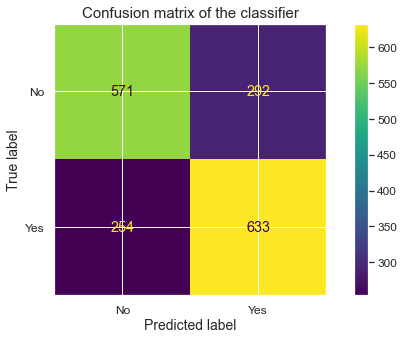

In [86]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=dt1, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

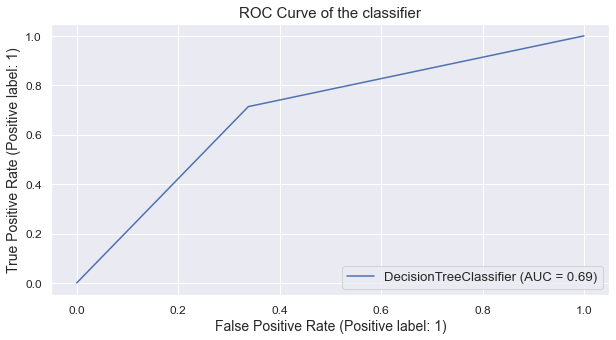

In [87]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=dt1, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Plotting the tree

Next, let's examine the splits of the tree. We'll do this by using the `plot_tree()` function that we imported. We pass to it our fit model as well as some additional parameters. Note that if we did not set `max_depth=2`, the function would return a plot of the entire tree, all the way down to the leaf nodes. This is intractable and unnecessary. We're most interested in the splits nearest the root, because these tell us the most predictive features.

`class_names` displays what the majority class of each node is, and `filled` colors the nodes according to their majority class. 

Note that this plot represents how the tree grew from the _training data_. To make its predictions on the test data, the tree would simply pass each customer in the test data through its splits, from the root node all the way down to a leaf node.

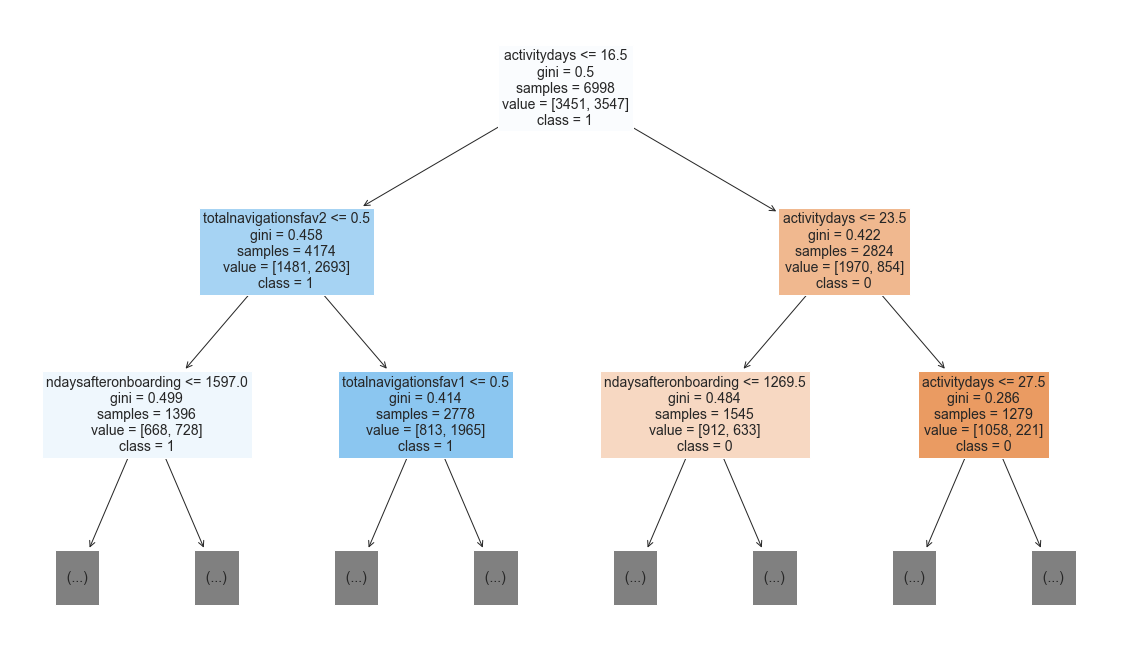

In [88]:
plt.figure(figsize=(20,12))
plot_tree(dt1, max_depth=2, feature_names=X.columns, class_names=['0','1'], fontsize=14, filled=True)
plt.show()

How do we read this plot? The first line of information in each node is the feature and split point that the model identified as being most predictive. In other words, this is the question that is being asked at that split. For our root node, the question was: _Is the customer less than or equal to 42.5 years old?_

At each node, if the answer to the question it asks is "yes," the sample would move to the child node on the left. If the answer is "no," the sample would go to the child node on the right.

`gini` refers to the node's _Gini impurity_. This is a way of measuring how "pure" a node is. The value can range from 0 to 0.5. A Gini score of 0 means there is no impurity&mdash;the node is a leaf, and all of its samples are of a single class. A score of 0.5 means the classes are all equally represented in that node.

`samples` is simply how many samples are in that node, and `value` indicates how many of each class are in the node. Returning to the root node, we have `value = [5972, 1528]`. Notice that these numbers sum to 7,500, which is the number of samples in the node. This tells us that 5,972 customers in this node stayed (y=0) and 1,528 customers churned (y=1).

Lastly, we have `class`. This tells us the majority class of the samples in each node.

### Build a feature importance graph

Uncover which features might be most important to your decision tree model by building a feature importance graph. 

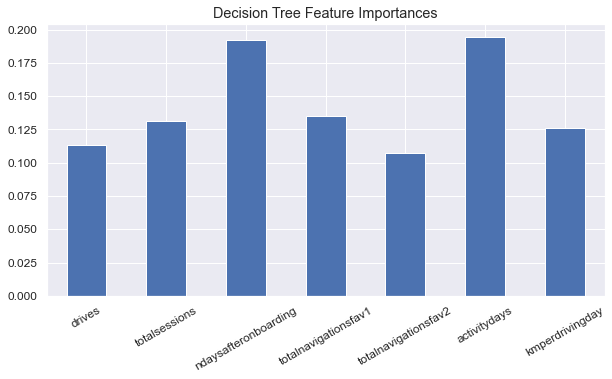

In [89]:
importances = dt1.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()

feature_importances.plot.bar(ax=ax, figsize=(10,5))
ax.set_title("Decision Tree Feature Importances")
ax.tick_params('x', rotation=30)

fig.show()

In [90]:
feature_importances_df = pd.DataFrame(feature_importances, columns=["importances"])
feature_importances_df = feature_importances_df.sort_values(by='importances')
feature_importances_df

,importances
totalnavigationsfav2,0.11
drives,0.11
kmperdrivingday,0.13
totalsessions,0.13
totalnavigationsfav1,0.13
ndaysafteronboarding,0.19
activitydays,0.19


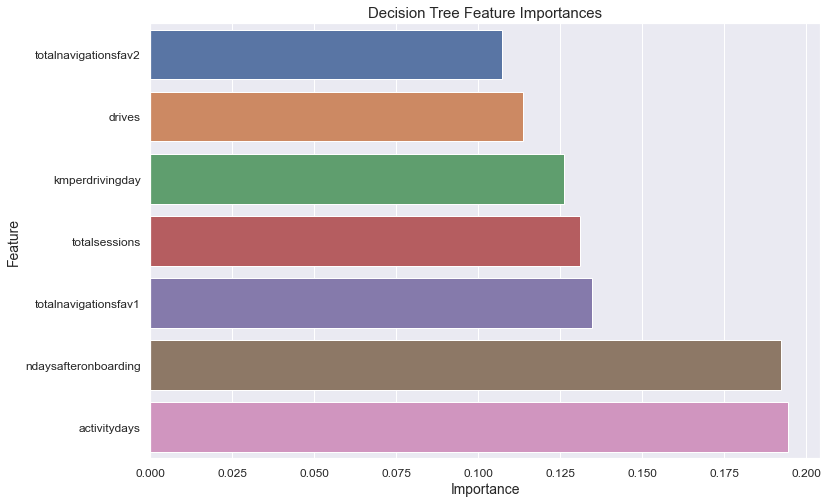

In [91]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=feature_importances_df, x=feature_importances_df.importances, y=feature_importances_df.index, orient='h')

ax.set_title("Decision Tree Feature Importances", fontsize=15)

ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

plt.show()

## Cross-validated hyperparameter tuning (GridSearchCV)

Cross-validating a model using GridSearchCV can be done in a number of different ways. If you find notebooks online that other people have written, you'll likely soon discover this for yourself. But all variations must fulfill the same general requirements. (Refer to the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for further reading.)

The format presented below is step-wise, making it easier to follow.

* Create a dictionary of hyperparameters to search over:

  - key = name of hyperparameter (string)
  - value = values to search over (list)
  
* Create a dictionary of scoring metrics to capture. These metrics can be selected from scikit-learn's [built-in options](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) or custom-defined. For this exercise, we'll capture accuracy, precision, recall, and F1 score so we can examine all of them. The metrics are entered as strings.

* Instantiate the classifier (and set the `random_state`)

* Instantiate the `GridSearchCV` object. Pass as arguments:
  - The classifier (`tuned_decision_tree`)
  - The dictionary of hyperparameters to search over (`tree_para`)
  - The dictionary of scoring metrics (`scoring`)
  - The number of cross-validation folds you want (`cv=5`)
  - The scoring metric that you want GridSearch to use when it selects the "best" model (i.e., the model that performs best on average over all validation folds) (`refit='f1'`*)

    \* The reason it's called `refit` is because once the algorithm finds the combination of hyperparameters that results in the best average score across all validation folds, it will then refit this model to _all_ of the training data. Remember, up until now, with a 5-fold cross-validation, the model has only ever been fit on 80% (4/5) of the training data, because the remaining 20% was held out as a validation fold.

* Fit the data (`X_train`, `y_train`) to the `GridSearchCV` object (`clf`)

Depending on the number of different hyperparameters you choose, the number of combinations you search over, the size of your data, and your available computing resources, this could take a long time. 

Now that the model is fit and cross-validated, we can use the `best_estimator_` attribute to inspect the hyperparameter values that yielded the highest F1 score during cross-validation.

The `best_score_` attribute returns the best average F1 score across the different folds among all the combinations of hyperparameters. Note that if we had set `refit='recall'` when we instantiated our `GridSearchCV` object earlier, then calling `best_score_` would return the best recall score, and the best parameters might not be the same as what they are in the above cell, because the model would be selected based on a different metric.

In [92]:
# Assign a dictionary of hyperparameters to search over
parameters = {'max_depth': np.arange(2,10,2),
             'min_samples_leaf': np.arange(1,10,2)}

In [93]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [94]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 0)

In [95]:
# Instantiate the GridSearch
dtgs = GridSearchCV(estimator=tuned_decision_tree, 
                   param_grid=parameters, 
                   scoring = scoring, 
                   cv=5, 
                   refit="roc_auc")

In [96]:
# Fit the model

%time
dtgs.fit(X_random_train, y_random_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'min_samples_leaf': array([1, 3, 5, 7, 9])},
             refit='roc_auc',
             scoring={'f1', 'roc_auc', 'recall', 'precision', 'accuracy'})

Now that the model is fit and cross-validated, we can use the `best_estimator_` attribute to inspect the hyperparameter values that yielded the highest score during cross-validation.

In [97]:
# Examine the best model from GridSearch
dtgs.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=0)

In [98]:
dtgs.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

The `best_score_` attribute returns the best average score across the different folds among all the combinations of hyperparameters. Note that if we had set `refit='recall'` when we instantiated our `GridSearchCV` object earlier, then calling `best_score_` would return the best recall score, and the best parameters might not be the same as what they are in the above cell, because the model would be selected based on a different metric.

In [99]:
dtgs.best_score_

0.7464038538050008

In [100]:
# we also find the data for all models evaluated

results = pd.DataFrame(dtgs.cv_results_)

print(results.shape)

results.head()

(20, 47)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.00,0.01,0.01,0.01,2,1,"{'max_depth': 2, 'min_samples_leaf': 1}",0.68,0.74,0.58,0.71,0.71,0.68,0.05,15,0.74,0.73,0.67,0.74,0.70,0.71,0.03,10,0.63,0.80,0.50,0.74,0.79,0.69,0.11,14,0.74,0.68,0.69,0.68,0.65,0.69,0.03,9,0.68,0.69,0.61,0.68,0.65,0.67,0.03,13
1,0.00,0.01,0.01,0.01,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.68,0.74,0.58,0.71,0.71,0.68,0.05,15,0.74,0.73,0.67,0.74,0.70,0.71,0.03,10,0.63,0.80,0.50,0.74,0.79,0.69,0.11,14,0.74,0.68,0.69,0.68,0.65,0.69,0.03,9,0.68,0.69,0.61,0.68,0.65,0.67,0.03,13
2,0.00,0.01,0.01,0.01,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.68,0.74,0.58,0.71,0.71,0.68,0.05,15,0.74,0.73,0.67,0.74,0.70,0.71,0.03,10,0.63,0.80,0.50,0.74,0.79,0.69,0.11,14,0.74,0.68,0.69,0.68,0.65,0.69,0.03,9,0.68,0.69,0.61,0.68,0.65,0.67,0.03,13
3,0.01,0.01,0.00,0.01,2,7,"{'max_depth': 2, 'min_samples_leaf': 7}",0.68,0.74,0.58,0.71,0.71,0.68,0.05,15,0.74,0.73,0.67,0.74,0.70,0.71,0.03,10,0.63,0.80,0.50,0.74,0.79,0.69,0.11,14,0.74,0.68,0.69,0.68,0.65,0.69,0.03,9,0.68,0.69,0.61,0.68,0.65,0.67,0.03,13
4,0.00,0.00,0.01,0.01,2,9,"{'max_depth': 2, 'min_samples_leaf': 9}",0.68,0.74,0.58,0.71,0.71,0.68,0.05,15,0.74,0.73,0.67,0.74,0.70,0.71,0.03,10,0.63,0.80,0.50,0.74,0.79,0.69,0.11,14,0.74,0.68,0.69,0.68,0.65,0.69,0.03,9,0.68,0.69,0.61,0.68,0.65,0.67,0.03,13


In [101]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_roc_auc', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[["param_max_depth","param_min_samples_leaf","mean_test_accuracy", "mean_test_recall",
         "mean_test_precision","mean_test_f1","mean_test_roc_auc"]].head()

,param_max_depth,param_min_samples_leaf,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1,mean_test_roc_auc
0,4,1,0.70,0.75,0.71,0.73,0.75
1,4,3,0.70,0.75,0.71,0.73,0.75
2,4,5,0.70,0.75,0.71,0.73,0.75
3,4,7,0.70,0.75,0.71,0.73,0.75
4,4,9,0.70,0.75,0.71,0.73,0.74


In [102]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
    
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc
                        },
                        ignore_index=True
                       )
  
    return table

In [104]:
dtgs_cv_table = make_results(model_name="Decision Tree GSCV", model_object=dtgs)
dtgs_cv_table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Decision Tree GSCV,0.73,0.75,0.71,0.70,0.75


### Using RandomSearchCV

Randomised grid search is very useful in finding near-optimal hyper parameters for any machine learning models.

Rules of thumb: with 60 iterations, 95% of the time, best 5% sets of parameters can be found, regardless of grid size.

In [105]:
dt2 = DecisionTreeClassifier(random_state=0)

In [106]:
parameters = { 'criterion': ['gini', 'entropy'],
               'max_depth': np.arange(2,11,2),
               'min_samples_split': np.arange(2,21,3),
               'min_samples_leaf':np.arange(1,11,2)
             }

In [107]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [108]:
dt2_randm = RandomizedSearchCV(estimator=dt2, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=2, scoring=scoring, refit='roc_auc', return_train_score=True)

In [109]:
%%time
dt2_randm.fit(X_random_train, y_random_train)

CPU times: total: 359 ms
Wall time: 3.83 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=55, n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  4,  6,  8, 10]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17, 20])},
                   refit='roc_auc', return_train_score=True,
                   scoring={'f1', 'roc_auc', 'recall', 'precision', 'accuracy'})

In [110]:
dt2_randm.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=8,
                       random_state=0)

In [111]:
dt2_randm.best_score_

0.7464038538050008

In [112]:
dt2_randm.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_depth': 4,
 'criterion': 'gini'}

In [113]:
# we also find the data for all models evaluated

results = pd.DataFrame(dt2_randm.cv_results_)

print(results.shape)

results.head()

(55, 84)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,split4_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.01,0.01,0.01,0.01,17,3,10,entropy,"{'min_samples_split': 17, 'min_samples_leaf': ...",0.67,0.72,0.63,0.70,0.70,0.68,0.03,37,0.85,0.86,0.87,0.85,0.84,0.85,0.01,0.70,0.73,0.65,0.67,0.70,0.69,0.03,48,0.93,0.92,0.94,0.92,0.93,0.93,0.01,0.66,0.78,0.63,0.73,0.73,0.71,0.05,37,0.83,0.91,0.90,0.90,0.83,0.88,0.03,0.69,0.67,0.63,0.66,0.68,0.66,0.02,54,0.86,0.81,0.84,0.81,0.85,0.84,0.02,0.66,0.68,0.61,0.66,0.67,0.65,0.02,49,0.84,0.84,0.86,0.83,0.83,0.84,0.01
1,0.01,0.01,0.01,0.01,8,7,4,gini,"{'min_samples_split': 8, 'min_samples_leaf': 7...",0.73,0.76,0.69,0.73,0.74,0.73,0.02,3,0.74,0.77,0.76,0.77,0.78,0.76,0.01,0.74,0.77,0.72,0.76,0.74,0.75,0.02,1,0.79,0.80,0.81,0.80,0.80,0.80,0.01,0.75,0.80,0.66,0.75,0.81,0.75,0.05,10,0.74,0.79,0.74,0.78,0.80,0.77,0.02,0.70,0.72,0.72,0.71,0.69,0.71,0.01,1,0.74,0.75,0.77,0.75,0.75,0.75,0.01,0.70,0.72,0.68,0.70,0.70,0.70,0.01,1,0.72,0.75,0.75,0.75,0.75,0.74,0.01
2,0.00,0.01,0.01,0.01,14,5,4,gini,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.73,0.76,0.69,0.73,0.74,0.73,0.02,3,0.74,0.77,0.76,0.77,0.78,0.76,0.01,0.74,0.77,0.72,0.76,0.74,0.75,0.02,1,0.79,0.80,0.81,0.80,0.80,0.80,0.01,0.75,0.80,0.66,0.75,0.81,0.75,0.05,10,0.74,0.79,0.74,0.78,0.80,0.77,0.02,0.70,0.72,0.72,0.71,0.69,0.71,0.01,1,0.74,0.75,0.77,0.75,0.75,0.75,0.01,0.70,0.72,0.68,0.70,0.70,0.70,0.01,1,0.72,0.75,0.75,0.75,0.75,0.74,0.01
3,0.01,0.00,0.01,0.00,14,9,10,gini,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.65,0.69,0.68,0.67,0.71,0.68,0.02,48,0.81,0.83,0.83,0.84,0.82,0.83,0.01,0.71,0.70,0.72,0.70,0.70,0.71,0.01,35,0.90,0.90,0.91,0.91,0.91,0.91,0.01,0.63,0.70,0.65,0.66,0.73,0.67,0.04,52,0.79,0.83,0.82,0.84,0.79,0.82,0.02,0.68,0.68,0.72,0.69,0.69,0.69,0.02,16,0.84,0.82,0.83,0.84,0.85,0.84,0.01,0.64,0.67,0.68,0.66,0.68,0.67,0.01,32,0.81,0.81,0.82,0.83,0.81,0.82,0.01
4,0.01,0.00,0.01,0.00,2,1,8,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.71,0.71,0.67,0.71,0.71,0.70,0.01,29,0.87,0.86,0.88,0.86,0.85,0.87,0.01,0.69,0.66,0.66,0.66,0.68,0.67,0.01,52,0.93,0.92,0.95,0.92,0.92,0.93,0.01,0.74,0.76,0.66,0.76,0.78,0.74,0.04,18,0.91,0.91,0.91,0.93,0.90,0.91,0.01,0.69,0.66,0.69,0.66,0.65,0.67,0.02,46,0.84,0.82,0.86,0.80,0.81,0.83,0.02,0.68,0.66,0.66,0.67,0.65,0.67,0.01,33,0.86,0.85,0.87,0.84,0.83,0.85,0.01


In [114]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_roc_auc', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[["param_min_samples_split","param_max_depth","param_min_samples_leaf","mean_test_accuracy", "mean_test_recall",
         "mean_test_precision","mean_test_f1","mean_test_roc_auc"]].head()

,param_min_samples_split,param_max_depth,param_min_samples_leaf,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1,mean_test_roc_auc
0,17,4,3,0.70,0.75,0.71,0.73,0.75
1,20,4,5,0.70,0.75,0.71,0.73,0.75
2,14,4,5,0.70,0.75,0.71,0.73,0.75
3,8,4,7,0.70,0.75,0.71,0.73,0.75
4,5,4,3,0.70,0.75,0.71,0.73,0.75


In [115]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [116]:
# Call the function on our model
dtrs_result_table = make_results("Decision Tree RCV", dt2_randm)

In [117]:
dtrs_result_table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Decision Tree RCV,0.73,0.75,0.71,0.70,0.75


**=================================================================================================================**

### Tuned Decision Tree Model

In [119]:
dt3 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=7, min_samples_split=8,
                       random_state=0)

In [120]:
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=8,
                       random_state=0)

In [121]:
dt3pred = dt3.predict(X_test)

In [122]:
dt3pred[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [123]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, dt3pred))
print('Precision:', '%.3f' % precision_score(y_test, dt3pred))
print('Recall:', '%.3f' % recall_score(y_test, dt3pred))
print('F1 Score:', '%.3f' % f1_score(y_test, dt3pred))
print('AUC score:', '%3.f' % roc_auc_score(y_test, dt3pred))

Accuracy: 0.699
Precision: 0.673
Recall: 0.790
F1 Score: 0.727
AUC score:   1


**=================================================================================================================**

## Cross-Validation

When performing supervised machine learning analysis, it is common to withhold a portion of the data to test the final model's performance. This model testing is performed on the 'unseen' data, which the model was not trained on. This withholding of a portion of the dataset for testing is called Cross-Validation. Cross-Validation can also be used to select hyper-parameters and test the final model. In this section, we will focus on the test data only.

Cross-Validation also helps avoid over-fitting; a complex model could repeat the labels of the samples that it has just seen and, therefore, would have a perfect score but would fail to predict anything useful on the 'unseen' data. Furthermore, a complex model could just be modeling noise.

Cross validation method involves dividing the dataset into 3 parts:

*   training set - is a portion of the data used for training the model
*   validation set - is a portion of the data used to optimize the hyper-parameters of the model. This will     be illustrated in the next lab
*   test set - is a portion of the data used to evaluate if the model generalizes enough to work on the     
    data it was not trained on   
    
`Scikit Learn` library contains many methods that can perform the splitting of the data into training, testing and validation sets. The most popular methods that we will cover in this Jupyter Notebook are:

*   train_test_split - creates a single split into train and test sets
*   K-fold - creates number of k-fold splits, allowing cross validation
*   cross_val_score - evaluates model's score through cross validation

[`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork783-2023-01-01) is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

Note that `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`. 


<img src = "cross_validation_diagram.png">
<img src = "k-fold.png">

### K-Fold Validation

In [124]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [125]:
cv = cross_validate(estimator=dt3, X=X_train, y=y_train, scoring="roc_auc", cv=kf, n_jobs=2, return_train_score=True)
cv

{'fit_time': array([0.01562333, 0.01562333, 0.0156281 , 0.03125095, 0.01561999]),
 'score_time': array([0.0065124, 0.0065124, 0.       , 0.       , 0.       ]),
 'test_score': array([0.74262276, 0.72900236, 0.76364015, 0.74367409, 0.75235453]),
 'train_score': array([0.76394813, 0.75885082, 0.75828748, 0.76290438, 0.76142406])}

In [126]:
cv["train_score"].mean()

0.7610829750502764

In [127]:
cv["test_score"].mean()

0.7462587786419006

### Cross Validation Score (Estimator can be any model)

In [128]:
dtcv_pred = cross_val_score(estimator=dt3, X=X_train, y=y_train, scoring="roc_auc", cv=kf, n_jobs=2)

In [129]:
dtcv_pred[0:5]

array([0.74262276, 0.72900236, 0.76364015, 0.74367409, 0.75235453])

In [130]:
dtcv_pred.mean()

0.7462587786419006

**=================================================================================================================**

# Bagging and Random Forest Models

Using **ensemble methods** can greatly improve the results achieved with weak machine learning algorithms, also called **weak learners**. Ensemble methods achieve better performance by aggregating the results of many statistically independent models. This process averages out the errors and produces a final better prediction. 

In this lab you will work with a widely used ensemble method known as **bootstrap aggregating** or simply **bagging**. Bagging follows a simple procedure:
1. N learners (machine learning models) are defined. 
2. N subsamples of the training data are created by **Bernoulli sampling with replacement**.
3. The N learners are trained on the subsamples of the training data.
4. The ensemble is scored by averaging, or taking a majority vote, of the predictions from the N learners.

**Classification and regression tree models** are most typically used with bagging methods. The most common such algorithm is know as the **random forest**. The random forest method is highly scalable and generally produces good results, even for complex problems. 

Classification and regression trees tend to be robust to noise or outliers in the training data. This is true for the random forest algorithm as well. 

### Using RandomSearchCV

In [132]:
# Instantiate the classifier
rf = RandomForestClassifier(random_state=0)

In [133]:
parameters = {'n_estimators':np.arange(50,250,50),
              'criterion': ('gini','entropy'),
              'max_depth': np.arange(2,11,2),
              'min_samples_split': np.arange(2,11,2),
              'min_samples_leaf': np.arange(1,11,2)
             }

In [134]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [135]:
rf_randm = RandomizedSearchCV(estimator=rf, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=2, scoring=scoring, refit='roc_auc')

In [136]:
%%time
rf_randm.fit(X_random_train, y_random_train)

CPU times: total: 1.02 s
Wall time: 47.3 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=55, n_jobs=2,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': array([ 2,  4,  6,  8, 10]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200])},
                   refit='roc_auc',
                   scoring={'f1', 'roc_auc', 'recall', 'precision', 'accuracy'})

In [137]:
rf_randm.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       random_state=0)

In [138]:
rf_randm.best_score_

0.7885490282066183

In [139]:
rf_randm.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 10,
 'criterion': 'entropy'}

In [140]:
# we also find the data for all models evaluated

results = pd.DataFrame(rf_randm.cv_results_)

print(results.shape)

results.head()

(55, 50)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.12,0.02,0.02,0.01,50,4,7,4,entropy,"{'n_estimators': 50, 'min_samples_split': 4, '...",0.80,0.77,0.71,0.74,0.75,0.75,0.03,15,0.81,0.79,0.74,0.80,0.76,0.78,0.03,44,0.84,0.83,0.72,0.77,0.82,0.80,0.04,15,0.76,0.71,0.70,0.72,0.69,0.72,0.02,42,0.77,0.73,0.69,0.72,0.71,0.72,0.03,32
1,0.25,0.02,0.03,0.00,100,2,9,6,entropy,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.79,0.77,0.72,0.74,0.75,0.75,0.02,17,0.81,0.78,0.75,0.80,0.76,0.78,0.02,37,0.81,0.81,0.73,0.74,0.82,0.78,0.04,30,0.77,0.72,0.71,0.74,0.70,0.73,0.02,21,0.77,0.74,0.70,0.73,0.71,0.73,0.02,12
2,0.12,0.01,0.02,0.01,50,6,7,10,gini,"{'n_estimators': 50, 'min_samples_split': 6, '...",0.77,0.76,0.70,0.74,0.76,0.75,0.02,45,0.81,0.79,0.75,0.80,0.76,0.78,0.02,36,0.77,0.81,0.68,0.75,0.82,0.77,0.05,52,0.77,0.72,0.73,0.74,0.71,0.73,0.02,8,0.75,0.73,0.69,0.72,0.73,0.73,0.02,22
3,0.35,0.02,0.05,0.01,150,8,9,10,gini,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.78,0.76,0.72,0.73,0.75,0.75,0.02,46,0.81,0.79,0.75,0.80,0.77,0.78,0.02,30,0.79,0.79,0.71,0.74,0.82,0.77,0.04,50,0.78,0.73,0.72,0.73,0.70,0.73,0.03,16,0.77,0.73,0.70,0.71,0.71,0.72,0.02,29
4,0.31,0.02,0.04,0.01,100,6,7,10,entropy,"{'n_estimators': 100, 'min_samples_split': 6, ...",0.78,0.76,0.70,0.75,0.76,0.75,0.02,44,0.82,0.79,0.75,0.79,0.77,0.78,0.02,34,0.77,0.79,0.69,0.78,0.82,0.77,0.04,50,0.78,0.73,0.71,0.73,0.71,0.73,0.02,12,0.76,0.73,0.69,0.73,0.72,0.73,0.02,25


In [141]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_roc_auc', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[["param_n_estimators", "param_min_samples_split","param_max_depth", "param_min_samples_leaf", 
         "param_criterion", "mean_test_accuracy", "mean_test_recall",
         "mean_test_precision","mean_test_f1","mean_test_roc_auc"]].head()

,param_n_estimators,param_min_samples_split,param_max_depth,param_min_samples_leaf,param_criterion,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1,mean_test_roc_auc
0,100,2,10,3,entropy,0.73,0.78,0.73,0.75,0.79
1,200,8,6,3,gini,0.73,0.79,0.73,0.76,0.79
2,200,6,6,3,entropy,0.73,0.78,0.73,0.76,0.79
3,150,10,6,5,gini,0.74,0.79,0.73,0.76,0.79
4,100,4,8,5,entropy,0.72,0.77,0.73,0.75,0.79


In [142]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [143]:
# Call the function on our model
rfcv_result_table = make_results("Random Forest RCV", rf_randm)

rfcv_result_table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Random Forest RCV,0.75,0.78,0.73,0.73,0.79


### Tuned Random Forest Model

In [144]:
rf2 = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, n_jobs=2, n_estimators=100,
                             min_samples_split=2, random_state=0)

In [145]:
rf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       n_jobs=2, random_state=0)

In [146]:
rf2_pred = rf2.predict(X_test)

In [147]:
rf2_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

### K-Fold Validation

In [148]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [149]:
cv = cross_validate(estimator=rf2, X=X_train, y=y_train, scoring="roc_auc", cv=kf, n_jobs=2, return_train_score=True)
cv

{'fit_time': array([0.8019433 , 0.78632236, 0.85120511, 0.78220677, 0.60143876]),
 'score_time': array([0.04686379, 0.05337238, 0.04686356, 0.05337715, 0.03124833]),
 'test_score': array([0.80879288, 0.80483982, 0.80948005, 0.80064915, 0.80972469]),
 'train_score': array([0.92532159, 0.92531305, 0.92363523, 0.92712034, 0.92217864])}

In [150]:
cv["train_score"].mean()

0.9247137709765333

In [151]:
cv["test_score"].mean()

0.8066973163100772

### RF Model Evaluation

In [152]:
rfcm = confusion_matrix(y_test,rf2_pred)
rfcm

array([[584, 279],
       [183, 704]], dtype=int64)

In [153]:
print(classification_report(y_test,rf2_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       863
           1       0.72      0.79      0.75       887

    accuracy                           0.74      1750
   macro avg       0.74      0.74      0.73      1750
weighted avg       0.74      0.74      0.74      1750



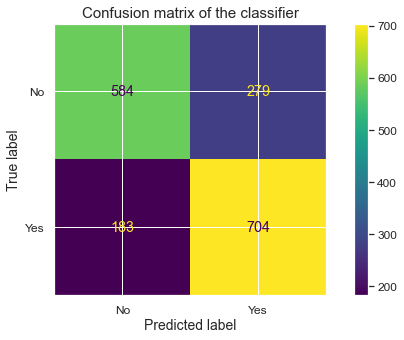

In [154]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=rf2, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

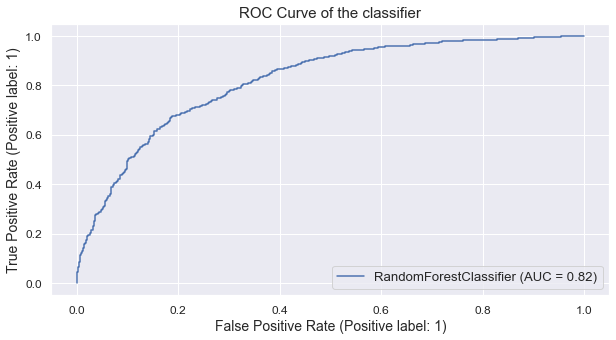

In [155]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=rf2, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Build a feature importance graph

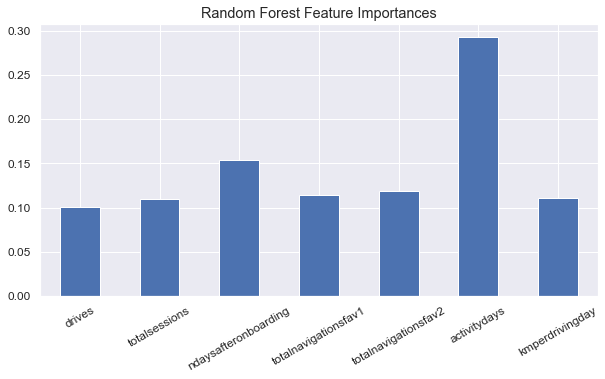

In [156]:
importances = rf2.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax, figsize=(10,5))

ax.set_title("Random Forest Feature Importances")
ax.tick_params('x', rotation=30)

fig.show()

In [157]:
feature_importances_df = pd.DataFrame(feature_importances, columns=["importances"])
feature_importances_df = feature_importances_df.sort_values(by='importances')
feature_importances_df

,importances
drives,0.10
totalsessions,0.11
kmperdrivingday,0.11
totalnavigationsfav1,0.11
totalnavigationsfav2,0.12
ndaysafteronboarding,0.15
activitydays,0.29


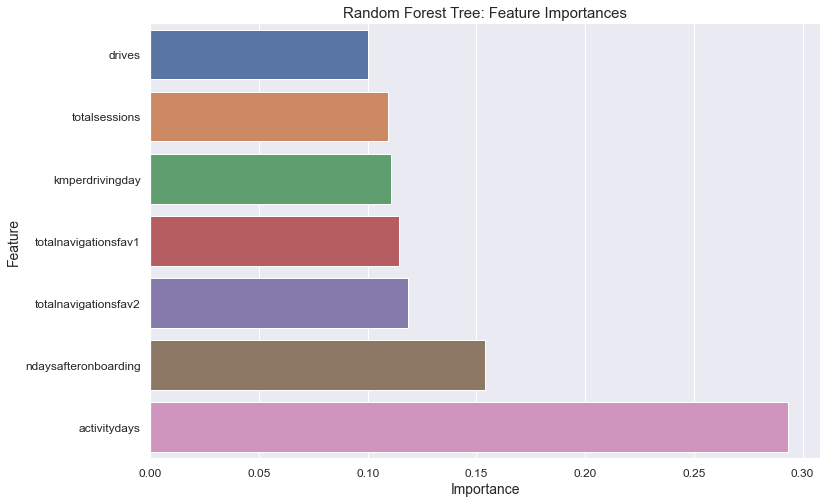

In [158]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=feature_importances_df, x=feature_importances_df.importances, y=feature_importances_df.index, orient='h')

ax.set_title("Random Forest Tree: Feature Importances", fontsize=15)

ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

plt.show()

**=================================================================================================================**

## Gradient Boosting (Future Expansion)

### Using RandomSearchCV

In [159]:
# Instantiate the classifier
gbc1 = GradientBoostingClassifier(random_state=0)

In [160]:
parameters = {'loss' : ('deviance', 'exponential'),
              'learning_rate': np.arange(0.0,1.2,0.2),
              'n_estimators': np.arange(50,250,50),
              'criterion': ('friedman_mse', 'squared_error'),
              'max_depth': np.arange(2,11,2),
              'min_samples_leaf': np.arange(5,25,5),
              'min_samples_split': np.arange(2,25,5)
             }

In [161]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [162]:
gbc_randm = RandomizedSearchCV(estimator=gbc1, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [163]:
%%time
gbc_randm.fit(X_random_train, y_random_train)

CPU times: total: 906 ms
Wall time: 46.2 s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=55, n_jobs=-1,
                   param_distributions={'criterion': ('friedman_mse',
                                                      'squared_error'),
                                        'learning_rate': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'loss': ('deviance', 'exponential'),
                                        'max_depth': array([ 2,  4,  6,  8, 10]),
                                        'min_samples_leaf': array([ 5, 10, 15, 20]),
                                        'min_samples_split': array([ 2,  7, 12, 17, 22]),
                                        'n_estimators': array([ 50, 100, 150, 200])},
                   refit='roc_auc',
                   scoring={'f1', 'roc_auc', 'recall', 'precision', 'accuracy'})

In [164]:
gbc_randm.best_estimator_

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4,
                           max_depth=2, min_samples_leaf=10,
                           min_samples_split=7, n_estimators=50,
                           random_state=0)

In [165]:
gbc_randm.best_score_

0.7753398164034409

In [166]:
gbc_randm.best_params_

{'n_estimators': 50,
 'min_samples_split': 7,
 'min_samples_leaf': 10,
 'max_depth': 2,
 'loss': 'deviance',
 'learning_rate': 0.4,
 'criterion': 'squared_error'}

In [167]:
# we also find the data for all models evaluated

results = pd.DataFrame(gbc_randm.cv_results_)

print(results.shape)

results.head()

(55, 52)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_loss,param_learning_rate,param_criterion,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.98,0.01,0.01,0.00,150,22,10,6,deviance,0.40,friedman_mse,"{'n_estimators': 150, 'min_samples_split': 22,...",0.73,0.70,0.67,0.71,0.73,0.71,0.02,30,0.79,0.72,0.74,0.76,0.77,0.76,0.03,16,0.69,0.71,0.65,0.73,0.78,0.71,0.04,35,0.77,0.70,0.69,0.70,0.69,0.71,0.03,26,0.72,0.68,0.65,0.69,0.69,0.69,0.02,29
1,1.45,0.04,0.02,0.00,200,2,20,8,deviance,0.80,squared_error,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.75,0.67,0.68,0.73,0.75,0.71,0.03,26,0.79,0.72,0.73,0.76,0.74,0.75,0.03,29,0.75,0.64,0.65,0.75,0.79,0.72,0.06,30,0.74,0.69,0.72,0.70,0.70,0.71,0.02,19,0.73,0.66,0.68,0.70,0.71,0.69,0.02,23
2,0.00,0.00,0.00,0.00,200,2,5,4,deviance,0.00,friedman_mse,"{'n_estimators': 200, 'min_samples_split': 2, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
3,0.13,0.02,0.01,0.00,50,12,20,2,exponential,1.00,squared_error,"{'n_estimators': 50, 'min_samples_split': 12, ...",0.72,0.70,0.69,0.67,0.73,0.70,0.02,41,0.76,0.74,0.72,0.75,0.74,0.74,0.01,35,0.72,0.72,0.65,0.66,0.79,0.71,0.05,39,0.72,0.68,0.73,0.68,0.68,0.70,0.02,35,0.70,0.67,0.68,0.65,0.69,0.68,0.02,39
4,0.47,0.02,0.01,0.00,200,7,15,2,deviance,0.80,friedman_mse,"{'n_estimators': 200, 'min_samples_split': 7, ...",0.74,0.66,0.64,0.72,0.72,0.70,0.04,44,0.79,0.69,0.70,0.74,0.74,0.73,0.03,43,0.74,0.68,0.61,0.73,0.75,0.70,0.05,44,0.74,0.65,0.67,0.70,0.68,0.69,0.03,43,0.72,0.64,0.64,0.69,0.68,0.67,0.03,44


In [168]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_roc_auc', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[["param_n_estimators", "param_min_samples_split","param_max_depth", "param_min_samples_leaf", 
         "param_criterion", "mean_test_accuracy", "mean_test_recall",
         "mean_test_precision","mean_test_f1","mean_test_roc_auc"]].head()

,param_n_estimators,param_min_samples_split,param_max_depth,param_min_samples_leaf,param_criterion,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1,mean_test_roc_auc
0,50,7,2,10,squared_error,0.70,0.76,0.71,0.73,0.78
1,150,2,8,5,squared_error,0.72,0.75,0.72,0.74,0.77
2,100,17,6,5,squared_error,0.72,0.77,0.72,0.74,0.77
3,150,12,8,10,squared_error,0.72,0.76,0.73,0.74,0.77
4,150,7,8,5,squared_error,0.71,0.75,0.73,0.73,0.77


In [169]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [170]:
# Call the function on our model
gbc_result_table = make_results("Gradient Boosting RCV", gbc_randm)
gbc_result_table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Gradient Boosting RCV,0.73,0.76,0.71,0.70,0.78


### Tuned Gradient Boosting Model

In [172]:
gbc2 = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4,
                           max_depth=2, min_samples_leaf=10,
                           min_samples_split=7, n_estimators=50,
                           random_state=0)

In [173]:
gbc2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4,
                           max_depth=2, min_samples_leaf=10,
                           min_samples_split=7, n_estimators=50,
                           random_state=0)

In [174]:
gbc2_pred = gbc2.predict(X_test)

In [175]:
gbc2_pred[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

### K-Fold Validation

In [176]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [177]:
cv = cross_validate(estimator=gbc2, X=X_train, y=y_train, scoring="roc_auc", cv=kf, n_jobs=2, return_train_score=True)
cv

{'fit_time': array([0.3915453 , 0.3915453 , 0.41303563, 0.41303563, 0.32349873]),
 'score_time': array([0.        , 0.        , 0.        , 0.00802898, 0.00805354]),
 'test_score': array([0.78517061, 0.79363529, 0.79712605, 0.78434282, 0.79533897]),
 'train_score': array([0.82647162, 0.82840359, 0.82779573, 0.82725432, 0.82808886])}

In [178]:
cv["train_score"].mean()

0.8276028234997902

In [179]:
cv["test_score"].mean()

0.7911227484919271

### Tuned Gradient Model Evaluation

In [180]:
gbcm = confusion_matrix(y_test,gbc2_pred)
gbcm

array([[596, 267],
       [211, 676]], dtype=int64)

In [181]:
print(classification_report(y_test, gbc2_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       863
           1       0.72      0.76      0.74       887

    accuracy                           0.73      1750
   macro avg       0.73      0.73      0.73      1750
weighted avg       0.73      0.73      0.73      1750



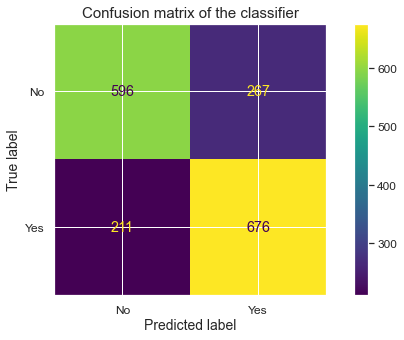

In [182]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=gbc2, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

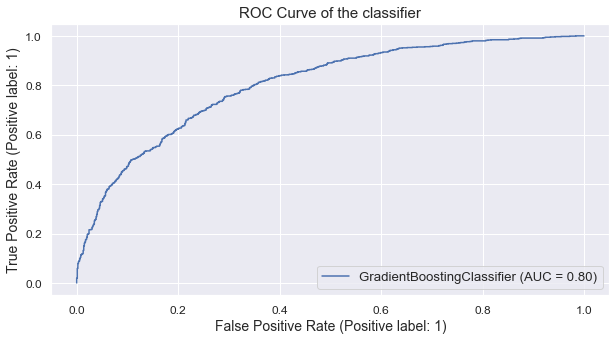

In [183]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=gbc2, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

**=================================================================================================================**

## XGBoost (Scikit-Learn)

XGBoost is a widespread implementation of gradient boosting. Let’s discuss some features of XGBoost that make it so attractive.

- XGBoost offers regularization, which allows you to control overfitting by introducing L1/L2 penalties on the weights and biases of each tree. This feature is not available in many other implementations of gradient boosting.
- Another feature of XGBoost is its ability to handle sparse data sets using the weighted quantile sketch algorithm. This algorithm allows us to deal with non-zero entries in the feature matrix while retaining the same computational complexity as other algorithms like stochastic gradient descent.
- XGBoost also has a block structure for parallel learning. It makes it easy to scale up on multicore machines or clusters. It also uses cache awareness, which helps reduce memory usage when training models with large datasets.
- Finally, XGBoost offers out-of-core computing capabilities using disk-based data structures instead of in-memory ones during the computation phase.


<img src = "treesalgo.jpg">

### Cross-validated hyperparameter tuning

The cross-validation process is the same as it was for the decision tree and random forest models. The only difference is that we're tuning different hyperparameters now. The steps are included below as a review. 

For details on cross-validating with `GridSearchCV`, refer back to the [decision tree notebook](https://colab.sandbox.google.com/drive/164Aa1ODOMSIY_5-ZP1PA5afGegTqqjcv?resourcekey=0-hZwiQ1rxwUAol5kaj7-o4w#tuning), or to the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) in scikit-learn.

1. Instantiate the classifier (and set the `random_state`). Note here that we've included a parameter called `objective` whose value is `binary:logistic`. This means that the model is performing a binary classification task that outputs a logistic probability. The objective would be different for different kinds of problems—for instance, if you were trying to predict more than two classes or performing a linear regression on continuous data. Refer to the [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/parameter.html) for more information.

2. Create a dictionary of hyperparameters to search over.

3. Create a dictionary of scoring metrics to capture. 

4. Instantiate the `GridSearchCV` object. Pass as arguments:
  - The classifier (`xgb`)
  - The dictionary of hyperparameters to search over (`cv_params`)
  - The dictionary of scoring metrics (`scoring`)
  - The number of cross-validation folds you want (`cv=5`)
  - The scoring metric that you want GridSearch to use when it selects the "best" model (i.e., the model that performs best on average over all validation folds) (`refit='f1'`)

5. Fit the data (`X_train`, `y_train`) to the `GridSearchCV` object (`xgb_cv`)

Note that we use the `%%time` magic at the top of the cell where we fit the model. This outputs the final runtime of the cell. 

In [184]:
xgbc1 = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [185]:
parameters = {'max_depth': np.arange(2,11,2),
              'learning_rate': np.arange(0.1,0.6,0.1),
              'n_estimators': np.arange(50,350,50),
              'min_child_weight': np.arange(1,6,1),
              'reg_alpha' : np.arange(1,6,1),
              'reg_lambda' : np.arange(1,6,1),
              'gamma' : np.arange(0.0,6.0,1.0)
             }

In [186]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [189]:
xgbgs = GridSearchCV(estimator=xgbc1,param_grid=parameters,scoring=scoring,
                     n_jobs=2, cv=5, verbose=1, refit='roc_auc', return_train_score=True)

In [ ]:
%%time
xgbgs.fit(X_random_train,y_random_train)

In [ ]:
xgbgs.best_estimator_

In [ ]:
xgbgs.best_score_

In [ ]:
xgbgs.best_params_

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [ ]:
# Create xgb model results table
xgb_cv_results = make_results('XGBoost GSCV', xgbgs)
xgb_cv_results

### Using RandomSearchCV

In [191]:
xgbc2 = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [192]:
#xgbc2 = XGBClassifier(random_state=0, n_estimators=100, objective='softmax:multi')

In [193]:
parameters = {'max_depth': np.arange(2,11,1),
              'eta': [0.01, 0.1, 0.5, 1.0],
              'n_estimators': np.arange(50,300,50),
              'min_child_weight': np.arange(1,4,1),
              'gamma': np.arange(0,11,2),
              'subsample': np.arange(0.1, 0.9, 0.1),
              'colsample_bytree': np.arange(0.5,0.9,0.1),
              'reg_alpha': np.arange(1,6,1),
              'reg_lambda': np.arange(1,6,1)
             }

In [194]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [195]:
xgbrandm = RandomizedSearchCV(estimator=xgbc2, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=2, scoring=scoring, refit='roc_auc')

In [196]:
xgbrandm.fit(X_random_train, y_random_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'eta': [0.01, 0.1, 0.5, 1.0],
                         

In [197]:
xgbrandm.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [198]:
xgbrandm.best_score_

0.7836294736894308

In [199]:
xgbrandm.best_params_

{'subsample': 0.8,
 'reg_lambda': 3,
 'reg_alpha': 5,
 'n_estimators': 200,
 'min_child_weight': 3,
 'max_depth': 4,
 'gamma': 2,
 'eta': 0.1,
 'colsample_bytree': 0.7999999999999999}

### Tuned XGBoost Model

In [200]:
xgbc2 = XGBClassifier(n_estimators=200, objective='binary:logistic', random_state=0, subsample= 0.8,
                      reg_lambda = 3, reg_alpha = 5, colsample_bytree=0.8, eta=0.1, 
                      gamma=2, min_child_weight=3, max_depth=4)

In [201]:
#xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='softmax:multi')

In [202]:
xgbc2.fit(X_train, y_train, eval_set=[(X_test,y_test)], eval_metric='error', early_stopping_rounds=30)

[0]	validation_0-error:0.36514
[1]	validation_0-error:0.29771
[2]	validation_0-error:0.29486
[3]	validation_0-error:0.28971
[4]	validation_0-error:0.29314
[5]	validation_0-error:0.30114
[6]	validation_0-error:0.29886
[7]	validation_0-error:0.29714
[8]	validation_0-error:0.29543
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.29714
[11]	validation_0-error:0.29943
[12]	validation_0-error:0.29829
[13]	validation_0-error:0.29429
[14]	validation_0-error:0.29200
[15]	validation_0-error:0.29257
[16]	validation_0-error:0.29257
[17]	validation_0-error:0.29143
[18]	validation_0-error:0.29200
[19]	validation_0-error:0.28914
[20]	validation_0-error:0.29029
[21]	validation_0-error:0.29086
[22]	validation_0-error:0.28971
[23]	validation_0-error:0.28229
[24]	validation_0-error:0.28343
[25]	validation_0-error:0.28171
[26]	validation_0-error:0.28514
[27]	validation_0-error:0.28629
[28]	validation_0-error:0.28514
[29]	validation_0-error:0.28343
[30]	validation_0-error:0.27829
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [203]:
#xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='mlogloss',early_stopping_rounds=10)

In [204]:
xgbc2_pred = xgbc2.predict(X_test)

In [205]:
xgbc2_pred

array([1, 0, 0, ..., 1, 1, 0])

### Model Evaluation

In [206]:
xgbcm = confusion_matrix( y_test, xgbc2_pred)
xgbcm

array([[592, 271],
       [194, 693]], dtype=int64)

In [207]:
print(classification_report(y_test,xgbc2_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       863
           1       0.72      0.78      0.75       887

    accuracy                           0.73      1750
   macro avg       0.74      0.73      0.73      1750
weighted avg       0.74      0.73      0.73      1750



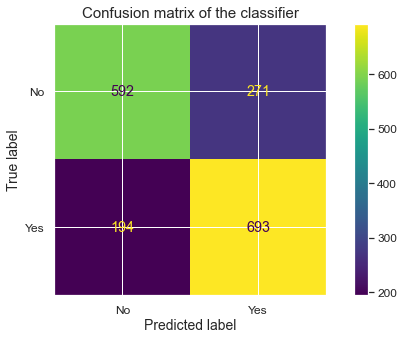

In [208]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=xgbc2, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

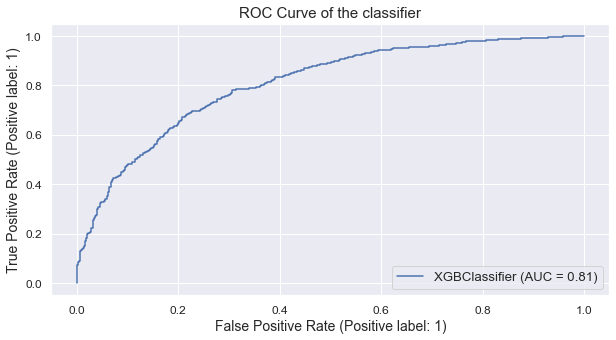

In [209]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=xgbc2, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### XGBoost Feature importance

The XGBoost library has a function called `plot_importance`, which we imported at the beginning of this notebook. This let's us check the features selected by the model as the most predictive. We can create a plot by calling this function and passing to it the best estimator from our grid search.

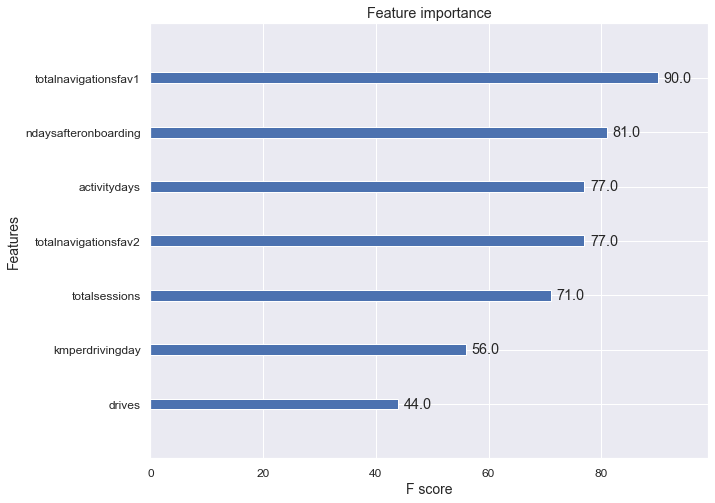

In [210]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgbrandm.best_estimator_, ax=ax);

In [211]:
xgbc2.feature_importances_

array([0.07143993, 0.06520348, 0.10648651, 0.0975401 , 0.15285438,
       0.4258056 , 0.08067004], dtype=float32)

In [212]:
feat_importances = pd.Series(xgbc2.feature_importances_, index=X.columns)

In [213]:
feat_importances

drives                 0.07
totalsessions          0.07
ndaysafteronboarding   0.11
totalnavigationsfav1   0.10
totalnavigationsfav2   0.15
activitydays           0.43
kmperdrivingday        0.08
dtype: float32

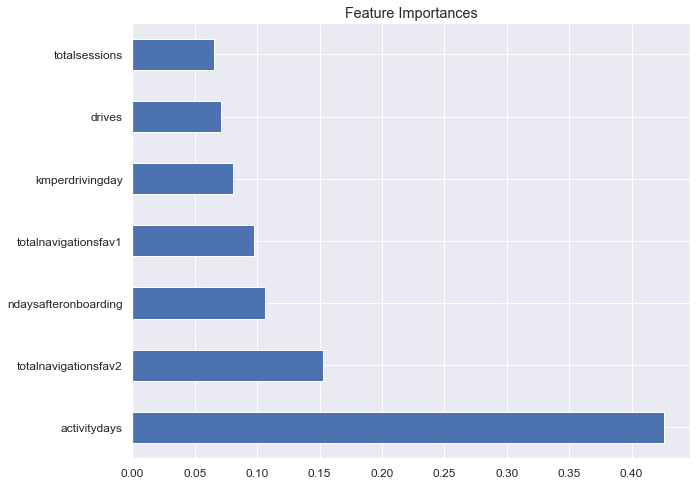

In [214]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,8))
plt.title('Feature Importances')
plt.show()

In [215]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [216]:
# Create xgb model results table
xgb_cv_table = make_results('XGBoost GSCV', xgbrandm)
xgb_cv_table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,XGBoost GSCV,0.75,0.76,0.73,0.72,0.78


## Compare models

Create a table of results to compare model performance.

In [171]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###

table = pd.DataFrame()
table = table.append(  dtrs_result_table,
                        ignore_index=True
                    )

table = table.append(   rfcv_result_table,
                        ignore_index=True
                    )

table = table.append(   gbc_result_table,
                        ignore_index=True
                    )

table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Decision Tree RCV,0.73,0.75,0.71,0.70,0.75
1,Random Forest RCV,0.75,0.78,0.73,0.73,0.79
2,Gradient Boosting RCV,0.73,0.76,0.71,0.70,0.78


**=================================================================================================================**

#### Python code done by Dennis Lam